In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf

In [26]:
tf.__version__

'2.1.0-rc1'

In [0]:
from tensorflow.keras.datasets import mnist

In [0]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

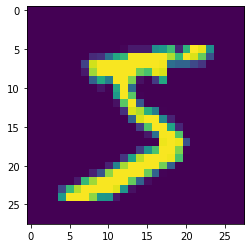

In [6]:
plt.imshow(X_train[0])

**Normalizing the data**

In [0]:
X_train = X_train/255
X_test = X_test/255

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.optimizers import SGD

**Encoder Model**

In [0]:
model = Sequential()
model.add(Flatten(input_shape=[28,28]))
model.add(Dense(units=400,activation='relu'))
model.add(Dense(units=200,activation='relu'))
model.add(Dense(units=100,activation='relu'))
model.add(Dense(units=50,activation='relu'))
model.add(Dense(units=25,activation='relu'))

**Decoder Model**

In [0]:
decoder = Sequential()
decoder.add(Dense(units=50,input_shape=[25],activation='relu'))
decoder.add(Dense(units=100,activation='relu'))
decoder.add(Dense(units=200,activation='relu'))
decoder.add(Dense(units=400,activation='relu'))
decoder.add(Dense(units=784,activation='sigmoid'))
decoder.add(Reshape([28,28]))

In [0]:
autoencoder = Sequential([model,decoder])

In [0]:
autoencoder.compile(loss='binary_crossentropy',optimizer=SGD(lr=1.5),metrics=['accuracy'])

In [13]:
autoencoder.fit(X_train,X_train,epochs=5,validation_data=(X_test,X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 7s 114us/sample - loss: 0.2551 - accuracy: 0.7915 - val_loss: 0.2218 - val_accuracy: 0.7920
Epoch 2/5
60000/60000 [==============================] - 6s 105us/sample - loss: 0.1989 - accuracy: 0.7960 - val_loss: 0.1829 - val_accuracy: 0.7943
Epoch 3/5
60000/60000 [==============================] - 6s 101us/sample - loss: 0.1650 - accuracy: 0.8014 - val_loss: 0.1555 - val_accuracy: 0.8016
Epoch 4/5
60000/60000 [==============================] - 6s 97us/sample - loss: 0.1519 - accuracy: 0.8032 - val_loss: 0.1479 - val_accuracy: 0.8016
Epoch 5/5
60000/60000 [==============================] - 6s 99us/sample - loss: 0.1431 - accuracy: 0.8052 - val_loss: 0.1382 - val_accuracy: 0.8062


In [0]:
prediction = autoencoder.predict(X_test[:10])

**Orignal Image**# New Section

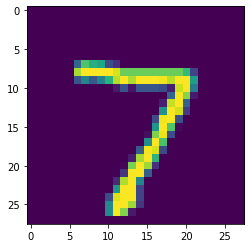

In [15]:
plt.imshow(X_test[0])

**Reconstructed Image after passing through an autoencoder**

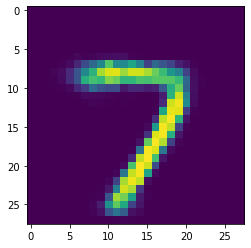

In [16]:
plt.imshow(prediction[0])

**Adding noise to the data**

In [0]:
from tensorflow.keras.layers import GaussianNoise

In [0]:
sample = GaussianNoise(0.2)

In [0]:
import tensorflow as tf
import numpy as np

## **Autoencoders for noisy images**

In [0]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
# Add noise to images before going through autoencoder
encoder.add(GaussianNoise(0.2))
encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(50,activation="relu"))
encoder.add(Dense(25,activation="relu"))

In [0]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

In [0]:
noise_remover = Sequential([encoder, decoder])

In [0]:
noise_remover.compile(loss="binary_crossentropy", optimizer='adam',metrics=['accuracy'])

In [24]:
noise_remover.fit(X_train, X_train, epochs=8,
                           validation_data=[X_test, X_test])

Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - 7s 111us/sample - loss: 0.1690 - accuracy: 0.8009 - val_loss: 0.1327 - val_accuracy: 0.8051
Epoch 2/8
60000/60000 [==============================] - 6s 105us/sample - loss: 0.1295 - accuracy: 0.8079 - val_loss: 0.1202 - val_accuracy: 0.8084
Epoch 3/8
60000/60000 [==============================] - 6s 103us/sample - loss: 0.1207 - accuracy: 0.8096 - val_loss: 0.1151 - val_accuracy: 0.8101
Epoch 4/8
60000/60000 [==============================] - 6s 103us/sample - loss: 0.1154 - accuracy: 0.8105 - val_loss: 0.1090 - val_accuracy: 0.8101
Epoch 5/8
60000/60000 [==============================] - 6s 103us/sample - loss: 0.1118 - accuracy: 0.8111 - val_loss: 0.1070 - val_accuracy: 0.8110
Epoch 6/8
60000/60000 [==============================] - 6s 104us/sample - loss: 0.1093 - accuracy: 0.8115 - val_loss: 0.1046 - val_accuracy: 0.8113
Epoch 7/8
60000/60000 [==============================] -

In [25]:
ten_noisey_images = sample(X_test[0:10],training=True)
denoised = noise_remover(ten_noisey_images[0:10])


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



The Original


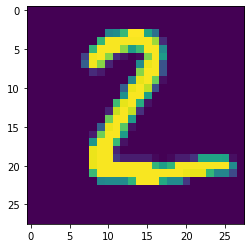

The Noisey Version


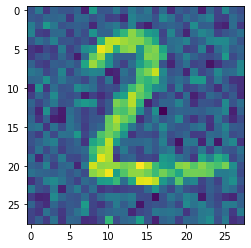

After going through denoiser


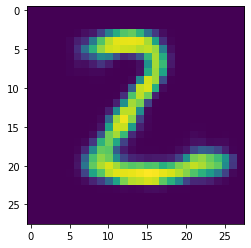

In [27]:
n = 1
print("The Original")
plt.imshow(X_test[n])
plt.show()
print("The Noisey Version")
plt.imshow(ten_noisey_images[n])
plt.show()
print("After going through denoiser")
plt.imshow(denoised[n])
plt.show()